# Train the model


In [4]:
#pip install -r requirements.txt


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import pickle
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [108]:
import os
import sys
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, LogisticRegression
from fast_ml.model_development import train_valid_test_split
#import mlflow
#import mlflow.sklearn
import logging
import matplotlib.pyplot as plt


import dvc.api

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly 
import plotly.graph_objs as go
import chart_studio.plotly as py
#import plotly.plotly as py
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [110]:
store_data = pd.read_csv(r"C:\Users\Genet Shanko\Pharmaceutical_Sales_Prediction\DVC_Dataset\Store.csv")
train_data= pd.read_csv(r"C:\Users\Genet Shanko\Pharmaceutical_Sales_Prediction\DVC_Dataset\train.csv",parse_dates = True,index_col = 'Date')

In [111]:
# remove features
store_data_up = store_data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [112]:
# replace missing values in CompetitionDistance with median for the store dataset
store_data_up.CompetitionDistance.fillna(store_data_up.CompetitionDistance.median(), inplace=True)

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

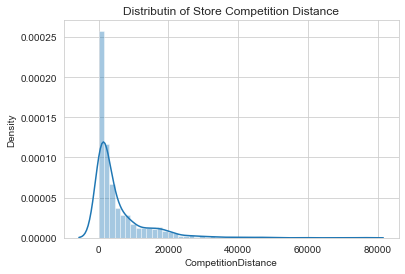

In [113]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store_data_up.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

In [114]:
# extract year, month, day and week of year from "Date"
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['Day'] = train_data.index.day
train_data['WeekOfYear'] = train_data.index.weekofyear
train_data = train_data.reset_index()

In [115]:
df = pd.merge(train_data, store_data_up, how='left', on='Store')
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [116]:
types = {'StateHoliday': np.dtype(str)}


In [117]:
class Information:
    def __init__(self):
        """
        This class give some brief information about the datasets.
        """
        print("Information object created")
    
    def _get_missing_values(self,data):
        """
        Find missing values of given datad
        :param data: checked its missing value
        :return: Pandas Series object
        """
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)

        #Returning missing values
        return missing_values

In [118]:
class Preprocess:
    def __init_(self):
        print("Preprocess object created")
        
    def remove_no_sales(self,train_data):
        not_open = train_data[(train_data['Open'] == 0) & (train_data['Sales'] != 0)]
        print("No closed store with sales: " + str(not_open.size == 0))
        train_data = train_data.loc[train_data['Sales'] > 0]
        return train_data
        
    def date_range(self,train):
        dates = pd.to_datetime(train_data['Date'], format="%Y%m%d:%H:%M:%S.%f").sort_values()
        dates = dates.unique()
        start_date = dates[0]
        end_date = dates[-1]
        print("Start date: ", start_date)
        print("End Date: ", end_date)
        date_range = pd.date_range(start_date, end_date).values

In [119]:
p1 = Preprocess()
p1.remove_no_sales(train_data)
p1.date_range(train_data)

No closed store with sales: True
Start date:  2013-01-01T00:00:00.000000000
End Date:  2015-07-31T00:00:00.000000000


In [187]:
class Datavisualisation:
    def __init__(self):
        print ("DataVisualisation object created")
        
    def sales_per_day(self,train_data):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        f, ax = plt.subplots(7, sharex=True, sharey=True)
        plt.rcParams['figure.figsize'] = (10.0, 50.0)
        for i in range(1, 8):
            mask = train_data[train_data['DayOfWeek'] == i]
            ax[i - 1].set_title("Day {0}".format(i))
            ax[i - 1].scatter(mask['Customers'], mask['Sales'], label=i)

        plt.legend()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('output1.png', dpi=300, bbox_inches='tight')
        plt.show()
    def sales_per_customer(self,train_data):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        plt.scatter(train_data['Customers'], train_data['Sales'], c=train_data['DayOfWeek'], alpha=0.8, cmap=plt.cm.get_cmap('plasma'))
        plt.colorbar()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('output2.png', dpi=300, bbox_inches='tight')
        plt.show()

        
    def state_holiday(self,train_data):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in ["0", "a", "b", "c"]:
            data = train_data[train_data['StateHoliday'] == i]
            if (len(data) == 0):
                continue
                
            plt.scatter(data['Customers'], data['Sales'], label=i)
        plt.legend()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('output3.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        

    def school_holiday(self,train_data):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in [0, 1]:
            data = train_data[train_data['SchoolHoliday'] == i]
            if (len(data) == 0): 
                continue            
        plt.scatter(data['Customers'], data['Sales'], label=i)
        plt.legend()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('output4.png', dpi=300, bbox_inches='tight')
        plt.show()

        
    def promo(self,train_data):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in [0, 1]:
            data = train_data[train_data['Promo'] == i]
            if (len(data) == 0):
                 continue
                
            plt.scatter(data['Customers'], data['Sales'], label=i)                                            
                                                 
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('output5.png', dpi=300, bbox_inches='tight')
        plt.show()

    def add_store(self,train_data,store_data_up):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        train_data['SalesPerCustomer'] = train_data['Sales'] / train_data['Customers']
        avg_store = train_data.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].median()
        avg_store = train_data.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
        avg_store.rename(columns=lambda x: 'Avg' + x, inplace=True)
        store = pd.merge(avg_store.reset_index(), store, on='Store')
        return store
    
    def store_type(self,store_data_up):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in ['a', 'b', 'c', 'd']:
            data = store[store['StoreType'] == i]
            if(len(data) == 0):
                 continue
        plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)
        plt.legend()
        plt.xlabel('Average Customers')
        plt.ylabel('Average Sales')
        plt.savefig('output6.png', dpi=300, bbox_inches='tight')
        plt.show()

    def assortment(self,store_data_up):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in ['a', 'b', 'c']:
            data = store_data_up[store_data_up['Assortment'] == i]
            if (len(data) == 0):
                continue
        plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)
        plt.legend()
        plt.xlabel('Average Customers')
        plt.ylabel('Average Sales')
        plt.savefig('output7.png', dpi=300, bbox_inches='tight')
        plt.show()

    def promo2(self,store_data_up):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in [0, 1]:
            data = store_data_up[store_data_up['Promo2'] == i]
            if (len(data) == 0):
                continue
            plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

        plt.legend()
        plt.xlabel('Average Customers')
        plt.ylabel('Average Sales')
        plt.savefig('output8.png', dpi=300, bbox_inches='tight')
        plt.show()
                                                
    def fill_na_values(self,store_data_up):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        # fill NaN values
        store_data_up["CompetitionDistance"].fillna(-1)
        plt.scatter(store_data_up['CompetitionDistance'], store_data_up['AvgSales'])

        plt.xlabel('CompetitionDistance')
        plt.ylabel('Average Sales')
        plt.savefig('output9.png', dpi=300, bbox_inches='tight')
        plt.show()
        return store

In [188]:
class Features:
    def __init__(self):
        print ("Features object created")
    def string_to_int(self,store_data_up,train_data):
        store_data_up['StoreType'] = store_data_up['StoreType'].astype('category').cat.codes
        store_data_up['Assortment'] = store_data_up['Assortment'].astype('category').cat.codes
        train_data["StateHoliday"] = train_data["StateHoliday"].astype('category').cat.codes
        merged = pd.merge(train_data, store_data_up, on='Store', how='left')
        return merged
    def remove_nan(self,merged):
        NaN_replace = 0
        merged.fillna(NaN_replace, inplace=True)
        merged['Year'] = merged.Date.dt.year
        merged['Month'] = merged.Date.dt.month
        merged['Day'] = merged.Date.dt.day
        merged['Week'] = merged.Date.dt.week
        return merged
    def Month_Competetions(self,merged):
        # Number of months that competition has existed for
        NaN_replace = 0
        merged['MonthsCompetitionOpen'] = 12 * (merged['Year'] - merged['CompetitionOpenSinceYear']) + \
        (merged['Month'] - merged['CompetitionOpenSinceMonth'])
        merged.loc[merged['CompetitionOpenSinceYear'] == NaN_replace, 'MonthsCompetitionOpen'] = NaN_replace
        return merged
    def Weeks_promo_open(self,merged):
        # Number of weeks that promotion has existed for
        NaN_replace = 0
        merged['WeeksPromoOpen'] = 12 * (merged['Year'] - merged['Promo2SinceYear']) + \
        (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])
        merged.loc[merged['Promo2SinceYear'] == NaN_replace, 'WeeksPromoOpen'] = NaN_replace
        return merged
    def to_int(self,merged):
        toInt = [
            'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear',
            'Promo2SinceWeek', 
            'Promo2SinceYear', 
            'MonthsCompetitionOpen', 
            'WeeksPromoOpen'
        ]
        merged[toInt] = merged[toInt].astype(int)
        return merged
    def add_mean(self,train_data,store):
        med_store = train_data.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
        med_store.rename(columns=lambda x: 'Med' + x, inplace=True)
        store = pd.merge(med_store.reset_index(), store, on='Store')
        return store
    

In [221]:
def add_mean(self,train_data,store_data_up):
        med_store = train_data.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
        med_store.rename(columns=lambda x: 'Med' + x, inplace=True)
        store = pd.merge(med_store.reset_index(), store, on='Store')
        return store
    

In [222]:
train_data_info = Information()
train_data_info._get_missing_values(train_data)

Information object created


Date             0
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekOfYear       0
dtype: int64

In [223]:
store_data_up_info = Information()
store_data_up_info._get_missing_values(store_data_up)

Information object created


Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [224]:
feature_selection = Features()

Features object created


In [226]:
#store = feature_selection.add_mean(train_data,store_data_up)

In [211]:
merge = feature_selection.string_to_int(store_data_up,train_data)

In [212]:
merge = feature_selection.remove_nan(merge)

In [227]:
#merge = feature_selection.Month_Competetions(merge)

In [196]:
merge = feature_selection.Weeks_promo_open(merge)

In [197]:
merge = feature_selection.to_int(merge)

In [204]:
merge.shape
merge['CompetitionDistance'] = np.log(merge['CompetitionDistance'] + 1)

In [228]:
X = [
    #'Store', 
    'Customers',
    'CompetitionDistance', 

    'Promo', 
    'Promo2', 

#     'SchoolHoliday',
    'StateHoliday',
    'StoreType',
    'Assortment',

    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',
    
    'MedSales',
    'MedCustomers',
    'MedSalesPerCustomer',

    'DayOfWeek',
    'Week',
    'Day',
    'Month',
    'Year',

    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear'
    
#'MonthsCompetitionOpen',
# WeeksPromoOpen'
]

#X_train, X_test, y_train, y_test = train_test_split(merge[X], merge['Sales'], test_size=0.1, random_state=10)

In [209]:
# Error calculating function according to kaggle
def rmspe(y, y_hat):
    return np.sqrt(np.mean(((y - y_hat) / y) ** 2))

rmpse_scorer = make_scorer(rmspe, greater_is_better = False) # Loss function

def score(model, X_train, y_train, y_test, y_hat):
    score = cross_val_score(model, X_train, y_train, scoring=rmpse_scorer, cv=5)
    print('Mean', score.mean())
    print('Variance', score.var())
    print('RMSPE', rmspe(y_test, y_hat))

def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

In [ ]:
import xgboost as xgb

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

xgboost_tree = xgb.XGBRegressor(
    n_estimators = 1000,
    max_depth = 2,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)
xgboost_tree.fit(X_train[X], np.log1p(y_train), 
                 eval_set = [(X_train[X], np.log1p(y_train)), (X_test[X], np.log1p(y_test))],
                 eval_metric = rmspe_xg,
                 early_stopping_rounds = 300
                )
filename="Private_score.sav"
pickle.dump(xgboost_tree, open(filename,"wb"))